In [1]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

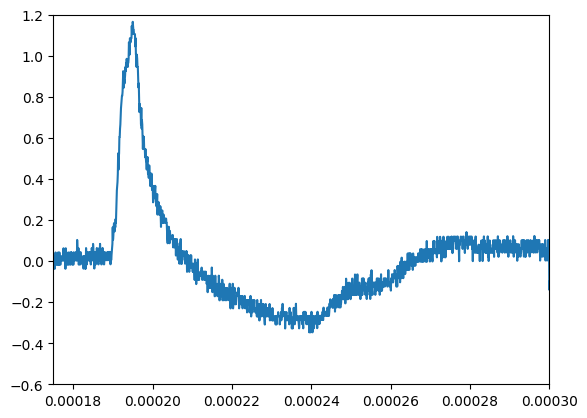

2187
3749


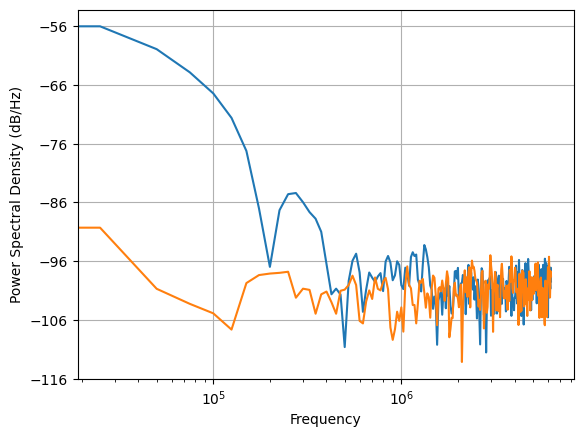

In [2]:
data = np.genfromtxt("../../data/20240822/hantekWaveData7018.csv", delimiter = ",")[1:]
data[:, 0] = np.linspace(0, 80e-9 * 4100, 4100)
data[:, 1][:3749] = scp.signal.detrend(data[:, 1][:3749] * -1, type = "linear", overwrite_data = True)
plt.xlim(1.75e-4, 3e-4)
plt.ylim(-0.6, 1.2)
plt.plot(data[:, 0], data[:, 1])
plt.show()
print(find_idx(data[:, 0], 0.000175))
print(find_idx(data[:, 0], 0.0003))
plt.psd(data[:, 1][2187:3749], 500, 1 / 80e-9)
plt.psd(data[:, 1][500:2100], 500, 1 / 80e-9)
plt.xscale("log")

In [3]:
snr = 10 * np.log10(np.max(np.abs(data[:, 1][2187:3749])) / np.std(data[:, 1][500:2187]))
print(snr)

16.56229515928574


In [4]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

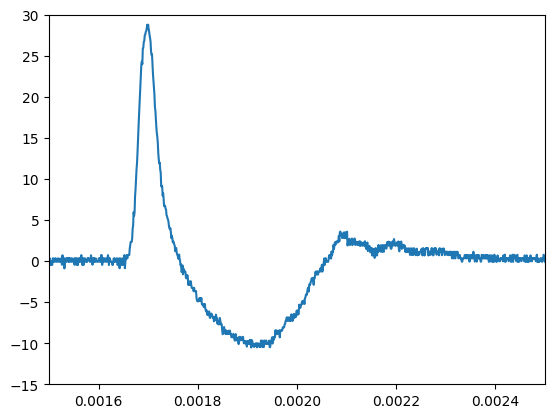

1


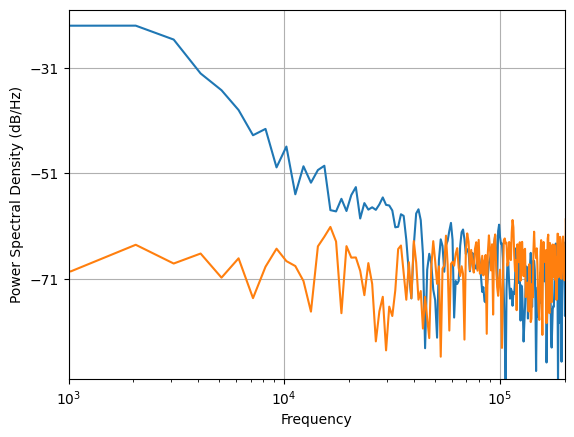

In [5]:
data = np.genfromtxt("../../data/20240823/hantekWaveData7030.csv", delimiter = ",")[1:]
data[:, 0] = np.linspace(0, 4000000e-9, 4100)
sos = scp.signal.butter(3, 5e5, fs = 4100 / 4000000e-9, btype = "lowpass", output = "sos")
data[:, 1] = scp.signal.sosfiltfilt(sos, data[:, 1])
data[:, 1][:3749] = scp.signal.detrend(data[:, 1][:3749], type = "linear", overwrite_data = True)
plt.xlim(1.5e-3, 2.5e-3)
plt.ylim(-15, 30)
plt.plot(data[:, 0], data[:, 1])
plt.show()
print(find_idx(data[:, 0], 5.2e-7))
plt.psd(data[:, 1][1681:2185], 1000, 4100 / 4000000e-9)
plt.psd(data[:, 1][100:1681], 1000, 4100 / 4000000e-9)
plt.xscale("log")
plt.xlim(1e3, 2e5)
plt.ylim(-90, -20)
plt.show()

In [6]:
snr = 10 * np.log10(np.max(np.abs(data[:, 1][1681:2185])) / np.std(data[:, 1][100:1681]))
print(snr)

19.30433048101433


In [34]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [35]:
data = [np.genfromtxt(f"../../data/20240826/0_50{x:02d}.csv", delimiter = "\t", skip_header = 4) for x in range(0, 24)]
for d in data:
    d[:, 0] = np.linspace(0, 5e-8 * len(d[:, 1]), len(d[:, 1]))
    d[:, 1] = scp.signal.detrend(d[:, 1], type = "linear", overwrite_data = True)
    sos = scp.signal.butter(3, 9e6, fs = 1 / 5e-8, btype = "lowpass", output = "sos")
    d[:, 1] = scp.signal.sosfiltfilt(sos, d[:, 1])
snr = [10 * np.log10(np.abs(np.max(data[i][:, 1][find_idx(data[0][:, 0], 2.5e-5):find_idx(data[0][:, 0], 4.5e-5)])) / np.std(data[i][:, 1][100:find_idx(data[0][:, 0], 2.5e-5)])) for i in range(0, 24)]
print("SNR:\t", np.round(np.mean(snr), 2), "+/-", np.round(np.std(snr), 2))
for d in data:
    plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
# plt.xlim(2.5e-5, 4.5e-5)
plt.xlim(0, 2.5e-5)
plt.show()
signal = []
noise = []
freqs = []
for i in range(0, 24):
    sig, freqs = plt.psd(data[i][:, 1][find_idx(data[0][:, 0], 2.5e-5):find_idx(data[0][:, 0], 4.5e-5)], Fs = 1 / 5e-8, NFFT = 512, c = "b", alpha = 0.1)
    n, freqs = plt.psd(data[i][:, 1][100:find_idx(data[0][:, 0], 2.5e-5)], Fs = 1 / 5e-8, NFFT = 512, c = "k", alpha = 0.1)
    signal.append(sig)
    noise.append(n)
    freqs = freqs
signal = np.mean(signal, axis = 0)
noise = np.mean(noise, axis = 0)
plt.plot(freqs, 10 * np.log10(signal), c = "b")
plt.plot(freqs, 10 * np.log10(noise), c = "k")
plt.xlim(0, 3e6)
plt.show()

FileNotFoundError: ../../data/20240826/0_5000.csv not found.

Took another set of cage data with a beam size around 5000 um. This is the set to be analyzed below.

In [36]:
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

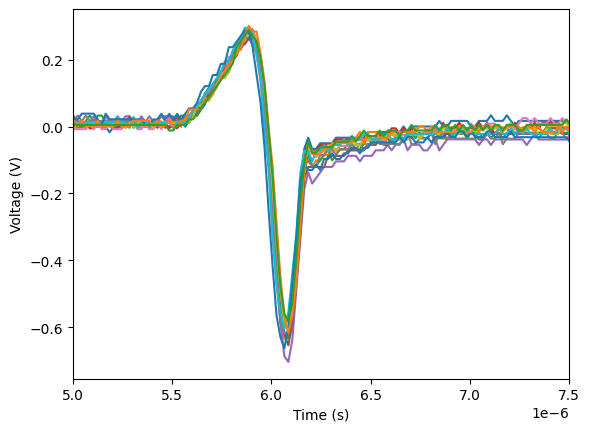

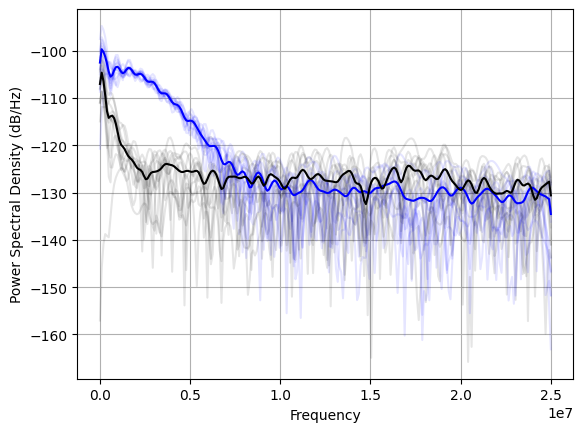

In [37]:
data = [np.genfromtxt(f"../../data/20240830/0_{x:01d}.csv", delimiter = "\t", skip_header = 4) for x in range(0, 12)]
data.append(np.genfromtxt("../../data/20240830/0_14.csv", delimiter = "\t", skip_header = 4))
for d in data:
    d[:, 0] = np.linspace(0, 2e-8 * len(d[:, 1]), len(d[:, 1]))
    d[:, 1] = scp.signal.detrend(d[:, 1], type = "linear", overwrite_data = True) * -1
    # sos = scp.signal.butter(3, 9e6, fs = 1 / 5e-8, btype = "lowpass", output = "sos")
    # d[:, 1] = scp.signal.sosfiltfilt(sos, d[:, 1])
for d in data:
    plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.xlim(.5e-5, .75e-5)
plt.show()
signal = []
noise = []
freqs = []
for i in range(0, 12):
    sig, freqs = plt.psd(data[i][:, 1][find_idx(data[0][:, 0], .5e-5):find_idx(data[0][:, 0], .75e-5)], Fs = 1 / 2e-8, NFFT = 512, c = "b", alpha = 0.1)
    n, freqs = plt.psd(data[i][:, 1][100:find_idx(data[0][:, 0], .5e-5)], Fs = 1 / 2e-8, NFFT = 512, c = "k", alpha = 0.1)
    signal.append(sig)
    noise.append(n)
    freqs = freqs
signal = np.mean(signal, axis = 0)
noise = np.mean(noise, axis = 0)
plt.plot(freqs, 10 * np.log10(signal), c = "b")
plt.plot(freqs, 10 * np.log10(noise), c = "k")
# plt.xlim(0, 3e6)
plt.show()

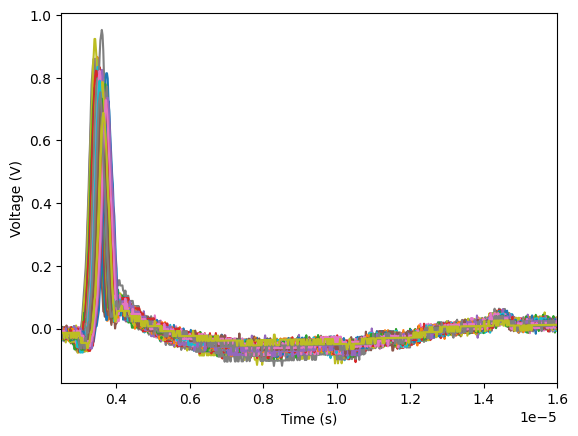

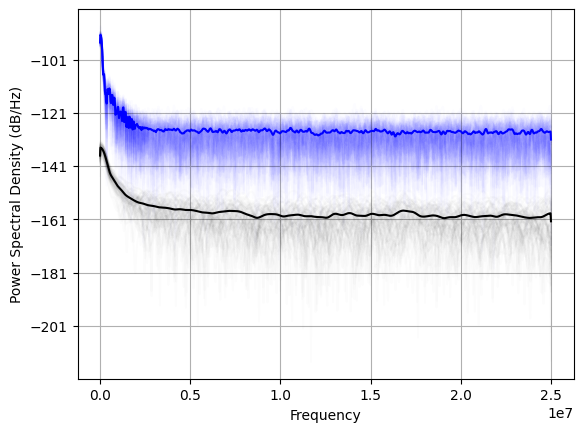

In [47]:
data = [np.genfromtxt(f"../../data/20240830/1000_{x:01d}.csv", delimiter = "\t", skip_header = 4) for x in range(0, 89)]
for d in data:
    d[:, 0] = np.linspace(0, 2e-8 * len(d[:, 1]), len(d[:, 1]))
    d[:, 1] = scp.signal.detrend(d[:, 1], type = "linear", overwrite_data = True)
    # sos = scp.signal.butter(3, 9e6, fs = 1 / 5e-8, btype = "lowpass", output = "sos")
    # d[:, 1] = scp.signal.sosfiltfilt(sos, d[:, 1])
for d in data:
    plt.plot(d[:, 0], d[:, 1])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.xlim(.25e-5, 1.6e-5)
plt.show()
signal = []
noise = []
freqs = []
for i in range(0, 89):
    sig, freqs = plt.psd(data[i][:, 1][find_idx(data[0][:, 0], .25e-5):find_idx(data[0][:, 0], 1.4e-5)], Fs = 1 / 2e-8, NFFT = 2048, c = "b", alpha = 0.01)
    n, freqs = plt.psd(data[i][:, 1][:find_idx(data[0][:, 0], 0.25e-5)], Fs = 1 / 2e-8, NFFT = 2048, c = "k", alpha = 0.01)
    signal.append(sig)
    noise.append(n)
    freqs = freqs
signal = np.mean(signal, axis = 0)
noise = np.mean(noise, axis = 0)
plt.plot(freqs, 10 * np.log10(signal), c = "b")
plt.plot(freqs, 10 * np.log10(noise), c = "k")
plt.show()